# Домашнее задание по теме: Конструирование признаков (Feature Engineering)

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [5]:
!conda install pandas matplotlib numpy seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



In [6]:
import numpy as np

np.__version__

'1.19.2'

In [7]:
import pandas as pd

pd.__version__

'1.2.4'

In [8]:
import matplotlib

matplotlib.__version__

'3.3.2'

In [9]:
import seaborn as sns

sns.__version__

'0.11.1'

## Создание `DataFrame` для примера

In [10]:
# социологический опрос
df = pd.DataFrame({'name_age': pd.Series(['Oleg 25', 'Pete 32',
                                          'Fedor 31', 'Teodor 55',
                                          'Elena 19', 'Viktor 18',
                                          'Anton 36', 'Boris 45',
                                          'Alex 25', 'Sergey 32'],
                                         dtype='string'),

                   'occupation': pd.Series(['programmer', 'teacher',
                                            'programmer', 'teacher',
                                            'student', 'student',
                                            'teacher', 'manager',
                                            'manager', 'programmer'],
                                           dtype='category'),

                   'weight': pd.Series([80, 98,
                                        86, 88,
                                        60, 75,
                                        91, 96,
                                        65, 73],
                                       dtype='int16'),

                  'life_satisfaction': pd.Series(['5 point', '3 point',
                                                  '4 point', '3 point',
                                                  '1 point', '2 point',
                                                  '4 point', '4 point',
                                                  '4 point', '4 point'],
                                           dtype=pd.CategoricalDtype(categories=['1 point',
                                                                                 '2 point',
                                                                                 '3 point',
                                                                                 '4 point',
                                                                                 '5 point'], ordered=True)),

                'relatives_income_k_rub': pd.Series(['150+', '30-80',
                                                     '30-80', '30-80',
                                                     '0-15', '16-30',
                                                     '30-80', '80-150',
                                                     '16-30', '80-150'],
                                                    dtype=pd.CategoricalDtype(categories=['0-15',
                                                                                '16-30',
                                                                                '30-80',
                                                                                '80-150',
                                                                                '150+'], ordered=True)),

                  'favourite_dish': pd.Series(['cake', 'steak',
                                               'steaks', 'sweet',
                                               'CAKES', 'candy',
                                               'candies', 'dairy',
                                               'milk', 'Dairy'],
                                              dtype='string'),

                   'income_per_hour_rub': pd.Series([300.50, 150.33,
                                                     265.54, 85.69,
                                                     3_150.54, 450.84,
                                                     2_140.36, 1_650.36,
                                                     2_425.84, 1_745.85],
                                                    dtype='float'),

                  'number_working_days_per_week': pd.Series([5, 5,
                                                             4, 2,
                                                             1, 6,
                                                             7, 2,
                                                             5, 4],
                                                            dtype='int8'),

                   'number_working_hours_per_day': pd.Series([8, 8,
                                                              7, 12,
                                                              24, 8,
                                                              3, 10,
                                                              7, 8],
                                                             dtype='int8'),

                   'tell_me_about_yourself': pd.Series(["I'm just a normal person. Nothing special.",
                                                        "I'm a good person. I teach children all over the world.",
                                                        "Nothing special, just a good programmer and father.",
                                                        "I'm a father and husband. I love teach my son.",
                                                        "I'm a good student and I want to travel all over the world. I'm going to be a programmer some day!",
                                                        "I'm a normal student. I want to be a teacher.",
                                                        "I'm a husband and teacher. I teach how to be a programmer. I have a son. I love him.",
                                                        "I don't know what to say. I'm a normal husband and good father.",
                                                        "Now I'm a manager but I'm going to be a programmer. I want to be a good student.",
                                                        "I'm special person! I can do what ever I want! I can be a husband and programmer simultaneously!"],
                                                       dtype='string'),

                   'favourite_weather': pd.Series(['rainbow/fog/warm',
                                                   'sun/fog/rainbow',
                                                   'chilly/fog/sun',
                                                   'rainbow',
                                                   'chilly/sun',
                                                   'warm/sun',
                                                   'chilly',
                                                   'rainbow/sun', 
                                                   'warm/sun',
                                                   'fog/rainbow'],
                                                  dtype='string'),

                    'answer_date_time': pd.Series(['10.10.2020 18:25', '18.12.2020 16:36',
                                                   '06.01.2021 10:14', '07.04.2021 23:25',
                                                   '26.11.2020 06:17', '18.05.2020 15:15',
                                                   '10.03.2021 09:08', '25.02.2020 04:57',
                                                   '28.08.2020 12:54', '10.09.2019 23:25'],
                                                  dtype='datetime64[ns]'),

                   'marital_status': pd.Series(['Married (and not separated)', 
                                                'Single (including living common law)',
                                                'Single (including living common law)', 
                                                'Married (and not separated)',
                                                'Single (including living common law)', 
                                                'Single (including living common law)',
                                                'Married (and not separated)', 
                                                'Single (including living common law)',
                                                'Married (and not separated)', 
                                                'Married (and not separated)'],
                                               dtype='string')
                  })

In [11]:
# отображать все колонки
pd.options.display.max_columns = None

In [12]:
df

,name_age,occupation,weight,life_satisfaction,relatives_income_k_rub,favourite_dish,income_per_hour_rub,number_working_days_per_week,number_working_hours_per_day,tell_me_about_yourself,favourite_weather,answer_date_time,marital_status
0,Oleg 25,programmer,80,5 point,150+,cake,300.50,5,8,I'm just a normal person. Nothing special.,rainbow/fog/warm,2020-10-10 18:25:00,Married (and not separated)
1,Pete 32,teacher,98,3 point,30-80,steak,150.33,5,8,I'm a good person. I teach children all over t...,sun/fog/rainbow,2020-12-18 16:36:00,Single (including living common law)
2,Fedor 31,programmer,86,4 point,30-80,steaks,265.54,4,7,"Nothing special, just a good programmer and fa...",chilly/fog/sun,2021-06-01 10:14:00,Single (including living common law)
3,Teodor 55,teacher,88,3 point,30-80,sweet,85.69,2,12,I'm a father and husband. I love teach my son.,rainbow,2021-07-04 23:25:00,Married (and not separated)
4,Elena 19,student,60,1 point,0-15,CAKES,3150.54,1,24,I'm a good student and I want to travel all ov...,chilly/sun,2020-11-26 06:17:00,Single (including living common law)
5,Viktor 18,student,75,2 point,16-30,candy,450.84,6,8,I'm a normal student. I want to be a teacher.,warm/sun,2020-05-18 15:15:00,Single (including living common law)
6,Anton 36,teacher,91,4 point,30-80,candies,2140.36,7,3,I'm a husband and teacher. I teach how to be a...,chilly,2021-10-03 09:08:00,Married (and not separated)
7,Boris 45,manager,96,4 point,80-150,dairy,1650.36,2,10,I don't know what to say. I'm a normal husband...,rainbow/sun,2020-02-25 04:57:00,Single (including living common law)
8,Alex 25,manager,65,4 point,16-30,milk,2425.84,5,7,Now I'm a manager but I'm going to be a progra...,warm/sun,2020-08-28 12:54:00,Married (and not separated)
9,Sergey 32,programmer,73,4 point,80-150,Dairy,1745.85,4,8,I'm special person! I can do what ever I want!...,fog/rainbow,2019-10-09 23:25:00,Married (and not separated)


## **ВНИМАНИЕ**

- Вместо строки `место_для_ответа` необходимо вписать свой ответ. Не рядом, а вместо. Остальную часть оформления менять не нужно.

- В ячейках с комментариями необходимо реализовать то, что описывает комментарий.

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Результаты обработки можно добавлять к специально созданному чистому `DataFrame`, или к существующему (как в примерах из лекции).

- **В конце каждого задания необходимо выводить результат в формате "было-стало"**. Может быть указано любое нужное количество колонок (зависит от задания). Важно показать результат по сравнению с исходными данными. Пример: `df[['name_age', 'age']]`.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- Если в задании требуется **нарисовать график, то он нужен вначале (показать как было) и в конце (как стало)**.

- В некоторых задания необходимо понимать, что значит каждое слово (для их группировки, например). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

In [13]:
# получить список колонок и их типы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name_age                      10 non-null     string        
 1   occupation                    10 non-null     category      
 2   weight                        10 non-null     int16         
 3   life_satisfaction             10 non-null     category      
 4   relatives_income_k_rub        10 non-null     category      
 5   favourite_dish                10 non-null     string        
 6   income_per_hour_rub           10 non-null     float64       
 7   number_working_days_per_week  10 non-null     int8          
 8   number_working_hours_per_day  10 non-null     int8          
 9   tell_me_about_yourself        10 non-null     string        
 10  favourite_weather             10 non-null     string        
 11  answer_date_time              10 no

### Анализ типов шкал

(см. [лекцию](../../03_data_analysis/lectures/08_statistical_data_types.ipynb))

| Наименование | Шкала |
|     -:      |  :-  |
| `name_age` | место_для_ответа |
| `occupation` | место_для_ответа |
| `weight` | место_для_ответа |
| `life_satisfaction` | место_для_ответа |
| `relatives_income_k_rub` | место_для_ответа |
| `favourite_dish` | место_для_ответа |
| `income_per_hour_rub` | место_для_ответа |
| `number_working_days_per_week` | место_для_ответа |
| `number_working_hours_per_day` | место_для_ответа |
| `tell_me_about_yourself` | место_для_ответа |
| `favourite_weather` | место_для_ответа |
| `answer_date_time` | место_для_ответа |
| `marital_status` | место_для_ответа |

## Строковые признаки

In [13]:
# получить все колонки типа string
df.select_dtypes(include='string')

,name_age,favourite_dish,tell_me_about_yourself,favourite_weather,marital_status
0,Oleg 25,cake,I'm just a normal person. Nothing special.,rainbow/fog/warm,Married (and not separated)
1,Pete 32,steak,I'm a good person. I teach children all over t...,sun/fog/rainbow,Single (including living common law)
2,Fedor 31,steaks,"Nothing special, just a good programmer and fa...",chilly/fog/sun,Single (including living common law)
3,Teodor 55,sweet,I'm a father and husband. I love teach my son.,rainbow,Married (and not separated)
4,Elena 19,CAKES,I'm a good student and I want to travel all ov...,chilly/sun,Single (including living common law)
5,Viktor 18,candy,I'm a normal student. I want to be a teacher.,warm/sun,Single (including living common law)
6,Anton 36,candies,I'm a husband and teacher. I teach how to be a...,chilly,Married (and not separated)
7,Boris 45,dairy,I don't know what to say. I'm a normal husband...,rainbow/sun,Single (including living common law)
8,Alex 25,milk,Now I'm a manager but I'm going to be a progra...,warm/sun,Married (and not separated)
9,Sergey 32,Dairy,I'm special person! I can do what ever I want!...,fog/rainbow,Married (and not separated)


### Получить информацию из строки

В колонке `name_age` содержится имя и возраст.

Необходимо получить данные о возрасте.

Результат сохранить в отдельную колонку `age`.

Подсказка: `apply`.

In [19]:
name_age_df = df['name_age'].str.split(' ',expand=True)
name_age_df.columns=['name','age']
name_age_df

,name,age
0,Oleg,25
1,Pete,32
2,Fedor,31
3,Teodor,55
4,Elena,19
5,Viktor,18
6,Anton,36
7,Boris,45
8,Alex,25
9,Sergey,32


### Группировка строковых признаков и формирование "групп"

Сгруппировать значения из колонки `favourite_dish` по своему усмотрению.

Нарисовать график показывающий распределение категорий в колонке (категория — количество в датасете).

Результат сохранить в отдельную колонку `favourite_dish_grouped`.

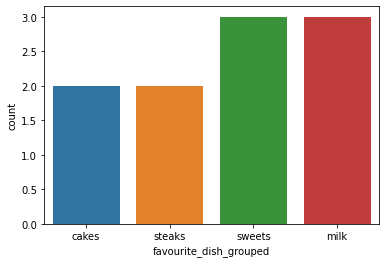

In [35]:
df.favourite_dish.value_counts()


sweets_replacement = dict.fromkeys(['candy', 'candies', 'sweet'], 'sweets')
sweets_replacement

cake_replacement = dict.fromkeys(['CAKES', 'cake'], 'cakes')
cake_replacement

milk_replacement = dict.fromkeys(['dairy', 'Dairy'], 'milk')
milk_replacement

steak_replacement = dict.fromkeys(['steak'], 'steaks')
steak_replacement

df['favourite_dish_grouped'] = df.favourite_dish.replace(to_replace=sweets_replacement).replace(to_replace=cake_replacement).replace(to_replace=milk_replacement).replace(to_replace=steak_replacement)
df[['favourite_dish', 'favourite_dish_grouped']]

_ = sns.countplot(x=df.favourite_dish_grouped)

### Разделить строку на несколько признаков

Разделить значения из колонки `favourite_weather`.

Результат сохранить в отдельные колонки с суффиксом `_fw` (в конце каждого названия).

In [37]:
favourite_weather_df = df.favourite_weather.apply(lambda x: pd.Series(True, index=[f'{tag}_fw' for tag in x.split("/")]))
favourite_weather_df = favourite_weather_df.fillna(False)
favourite_weather_df

,rainbow_fw,fog_fw,warm_fw,sun_fw,chilly_fw
0,True,True,True,False,False
1,True,True,False,True,False
2,False,True,False,True,True
3,True,False,False,False,False
4,False,False,False,True,True
5,False,False,True,True,False
6,False,False,False,False,True
7,True,False,False,True,False
8,False,False,True,True,False
9,True,True,False,False,False


### Преобразовать к другому типу

Преобразовать значения из колонки `marital_status` к `bool` (`True` = В браке).

Результат сохранить в отдельную колонку `is_married`.

In [39]:
df['is_married'] = df.marital_status.map({'Married (and not separated)': True, 'Single (including living common law)': False})
df[['marital_status', 'is_married']]

,marital_status,is_married
0,Married (and not separated),True
1,Single (including living common law),False
2,Single (including living common law),False
3,Married (and not separated),True
4,Single (including living common law),False
5,Single (including living common law),False
6,Married (and not separated),True
7,Single (including living common law),False
8,Married (and not separated),True
9,Married (and not separated),True


### Мешок слов (bag-of-words) на примере `CountVectorizer` (`sklearn`)

Преобразовать значения из колонки `tell_me_about_yourself`.

Использовать стандартные `stop_words` (английский язык). 

В результат включить ТОЛЬКО слова, которые встретились в тексте больше (>) 2 раз.

Результат сохранить в отдельные колонки с суффиксом _bw (в конце каждого названия).

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True, stop_words='english')
tell_cv = cv.fit_transform(df.tell_me_about_yourself)

vocab_dict = {}
for word, col_idx in cv.vocabulary_.items():
    num = sum(sum(x) for x in tell_cv[:, col_idx].toarray())
    vocab_dict[(word, col_idx)] = num

gte_2 = [k[1] for k, v in vocab_dict.items() if v > 2]
gte_2_array = tell_cv.toarray()[:, gte_2]
gte_2_col_names = [item_description_column_names[i] for i in gte_2]

df_tell_cv = pd.DataFrame(gte_2_array, columns=gte_2_col_names)

df = df.join(df_tell_cv.add_suffix("_bw"))
df[['tell_me_about_yourself'] + [n + '_bw' for n in gte_2_col_names]]


,tell_me_about_yourself,normal_bw,person_bw,special_bw,good_bw,teach_bw,programmer_bw,father_bw,husband_bw,student_bw,want_bw
0,I'm just a normal person. Nothing special.,1,1,1,0,0,0,0,0,0,0
1,I'm a good person. I teach children all over t...,0,1,0,1,1,0,0,0,0,0
2,"Nothing special, just a good programmer and fa...",0,0,1,1,0,1,1,0,0,0
3,I'm a father and husband. I love teach my son.,0,0,0,0,1,0,1,1,0,0
4,I'm a good student and I want to travel all ov...,0,0,0,1,0,1,0,0,1,1
5,I'm a normal student. I want to be a teacher.,1,0,0,0,0,0,0,0,1,1
6,I'm a husband and teacher. I teach how to be a...,0,0,0,0,1,1,0,1,0,0
7,I don't know what to say. I'm a normal husband...,1,0,0,1,0,0,1,1,0,0
8,Now I'm a manager but I'm going to be a progra...,0,0,0,1,0,1,0,0,1,1
9,I'm special person! I can do what ever I want!...,0,1,1,0,0,1,0,1,0,1


## Категориальные признаки

In [49]:
# получить все колонки типа category
df.select_dtypes(include='category')

,occupation,life_satisfaction,relatives_income_k_rub
0,programmer,5 point,150+
1,teacher,3 point,30-80
2,programmer,4 point,30-80
3,teacher,3 point,30-80
4,student,1 point,0-15
5,student,2 point,16-30
6,teacher,4 point,30-80
7,manager,4 point,80-150
8,manager,4 point,16-30
9,programmer,4 point,80-150


### Комбинации признаков с помощью bool mask filter

Преобразовать значения из колонки `occupation`.

Результат сохранить в отдельные колонки `is_programmer`, `is_teacher`, `is_student`, `is_manager`, `is_programmer_OR_student`, `is_teacher_OR_manager`.

In [52]:
df.occupation.value_counts()

df['is_programmer'] = df.occupation == 'programmer'
df['is_teacher'] = df.occupation == 'teacher'
df['is_student'] = df.occupation == 'student'
df['is_manager'] = df.occupation == 'manager'

df['is_programmer_OR_student'] = df.occupation.isin(['programmer', 'student'])
df['is_teacher_OR_manager'] = df.occupation.isin(['teacher', 'manager'])

df[['occupation', 'is_programmer', 'is_teacher', 'is_student', 'is_manager', 'is_programmer_OR_student', 'is_teacher_OR_manager']]

,occupation,is_programmer,is_teacher,is_student,is_manager,is_programmer_OR_student,is_teacher_OR_manager
0,programmer,True,False,False,False,True,False
1,teacher,False,True,False,False,False,True
2,programmer,True,False,False,False,True,False
3,teacher,False,True,False,False,False,True
4,student,False,False,True,False,True,False
5,student,False,False,True,False,True,False
6,teacher,False,True,False,False,False,True
7,manager,False,False,False,True,False,True
8,manager,False,False,False,True,False,True
9,programmer,True,False,False,False,True,False


### `OrdinalEncoder` (`sklearn`)

Значения колонок `relatives_income_k_rub` и `life_satisfaction` преобразовать в числа.

Результат сохранить в колонки `relatives_income_k_rub_enc_ord` и `life_satisfaction_enc_ord`.

ВНИМАНИЕ: необходимо сохранить правильный порядок категорий.

In [57]:
from sklearn.preprocessing import OrdinalEncoder

enc_ord = OrdinalEncoder(categories=[['0-15', '16-30', '30-80', '80-150', '150+'], 
                                     ['1 point', '2 point', '3 point', '4 point', '5 point']])

enc_ord.fit(df[['relatives_income_k_rub', 'life_satisfaction']])

df[['relatives_income_k_rub_ord', 'life_satisfaction_ord']] = enc_ord.transform(df[['relatives_income_k_rub', 'life_satisfaction']])
df[['relatives_income_k_rub', 'relatives_income_k_rub_ord', 'life_satisfaction', 'life_satisfaction_ord']]

,relatives_income_k_rub,relatives_income_k_rub_ord,life_satisfaction,life_satisfaction_ord
0,150+,4.0,5 point,4.0
1,30-80,2.0,3 point,2.0
2,30-80,2.0,4 point,3.0
3,30-80,2.0,3 point,2.0
4,0-15,0.0,1 point,0.0
5,16-30,1.0,2 point,1.0
6,30-80,2.0,4 point,3.0
7,80-150,3.0,4 point,3.0
8,16-30,1.0,4 point,3.0
9,80-150,3.0,4 point,3.0


### `OneHotEncoder` (`sklearn`)

Преобразовать значения колонки `occupation`.

Результат сохранить в колонки с префиксом `occupation_enc_oh` (пример: `occupation_enc_oh_programmer`).

In [60]:
from sklearn.preprocessing import OneHotEncoder

enc_oh = OneHotEncoder(sparse=False, categories=[df.occupation.unique()])
enc_oh.fit(df[['occupation']])
enc_oh_result = enc_oh.transform(df[['occupation']])
column_names = enc_oh.get_feature_names(['occupation_enc_oh'])
df_enc_oh_result = pd.DataFrame(enc_oh_result, columns=column_names)
df_enc_oh_result

,occupation_enc_oh_programmer,occupation_enc_oh_teacher,occupation_enc_oh_student,occupation_enc_oh_manager
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0


### Dummies (`pandas`)

Преобразовать значения колонки `occupation`.

Результат сохранить в колонки с префиксом `occupation_` (пример: `occupation_teacher`). Это произойдет автоматически, необходимо только проверить, что все сработало правильно.

In [61]:
dummies = pd.get_dummies(df[['occupation']])
dummies

,occupation_manager,occupation_programmer,occupation_student,occupation_teacher
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
5,0,0,1,0
6,0,0,0,1
7,1,0,0,0
8,1,0,0,0
9,0,1,0,0


### `CountEncoder` (`category_encoders`)

Заменить каждое значение колонок `occupation` и `life_satisfaction` количеством раз, сколько оно появляется в наборе данных.

Результат сохранить в колонку с префиксом `count_` (например, `count_life_satisfaction`).

In [63]:
import category_encoders as ce

count_enc = ce.CountEncoder()

count_encoded = count_enc.fit_transform(df[['occupation', 'life_satisfaction']])
df = df.join(count_encoded.add_suffix("_count"))

df[['occupation', 'occupation_count', 
    'life_satisfaction', 'life_satisfaction_count']]

ModuleNotFoundError: No module named 'category_encoders'

## Числовые признаки

In [14]:
# получить все колонки типа number
df.select_dtypes(include=np.number)

,weight,income_per_hour_rub,number_working_days_per_week,number_working_hours_per_day
0,80,300.50,5,8
1,98,150.33,5,8
2,86,265.54,4,7
3,88,85.69,2,12
4,60,3150.54,1,24
5,75,450.84,6,8
6,91,2140.36,7,3
7,96,1650.36,2,10
8,65,2425.84,5,7
9,73,1745.85,4,8


### Округление вещественных чисел

Округлить значения колонки `income_per_hour_rub` до сотен.

Пример: `66.87` округляется до `100.0`, `123456.78` округляется до `123500.0`. 

In [15]:
df['income_per_hour_rub_rounded'] = df.income_per_hour_rub.round(1)
df[['income_per_hour_rub', 'income_per_hour_rub_rounded']]

,income_per_hour_rub,income_per_hour_rub_rounded
0,300.50,300.5
1,150.33,150.3
2,265.54,265.5
3,85.69,85.7
4,3150.54,3150.5
5,450.84,450.8
6,2140.36,2140.4
7,1650.36,1650.4
8,2425.84,2425.8
9,1745.85,1745.8


### Объединение нескольких (агрегация) числовых признаков

Создать колонку `income_per_year` показывающую сколько денег зарабатывает человек в год на основе имеющихся колонок.

Предположим, что каждый работает 46 недель в году (52 недели - 4 отпуска - 2 праздничные выходные).

In [17]:
df['income_per_year'] = 46 * (df.number_working_days_per_week * df.number_working_hours_per_day * df.income_per_hour_rub)
df[['income_per_year', 'number_working_days_per_week', 'number_working_hours_per_day', 'income_per_hour_rub']]


,income_per_year,number_working_days_per_week,number_working_hours_per_day,income_per_hour_rub
0,552920.00,5,8,300.50
1,276607.20,5,8,150.33
2,342015.52,4,7,265.54
3,94601.76,2,12,85.69
4,3478196.16,1,24,3150.54
5,995454.72,6,8,450.84
6,2067587.76,7,3,2140.36
7,1518331.20,2,10,1650.36
8,3905602.40,5,7,2425.84
9,2569891.20,4,8,1745.85


### Приведение числового признака к категориальному и формирование "интервалов" (Binning/Discretization)

#### Биннинг по расстоянию (Binning by distance) с помощью `cut` (`pandas`)

Разбить значения колонки `weight` на **2** равномерно распределенных (`linspace`) бина.

Придумать название (`label`) для каждого бина.

Результат сохранить в колонку `weight_bins_linspace`.

In [22]:
weight_min, weight_max = df.weight.min(), df.weight.max()
weight_bins_linspace = np.linspace(weight_min, weight_max, 3)
weight_labels_linspace = ['skinny', 'fat']

df['weight_bins_linspace'] = pd.cut(df.weight, 
                                      bins=weight_bins_linspace, 
                                      labels=weight_labels_linspace,
                                      include_lowest=True)

df[['weight', 'weight_bins_linspace']]

,weight,weight_bins_linspace
0,80,fat
1,98,fat
2,86,fat
3,88,fat
4,60,skinny
5,75,skinny
6,91,fat
7,96,fat
8,65,skinny
9,73,skinny


## Дата и время

In [23]:
# получить все колонки типа datetime64
df.select_dtypes(include='datetime64')

,answer_date_time
0,2020-10-10 18:25:00
1,2020-12-18 16:36:00
2,2021-06-01 10:14:00
3,2021-07-04 23:25:00
4,2020-11-26 06:17:00
5,2020-05-18 15:15:00
6,2021-10-03 09:08:00
7,2020-02-25 04:57:00
8,2020-08-28 12:54:00
9,2019-10-09 23:25:00


### День недели

С помощью колонки `answer_date_time` создать колонку `is_friday` типа `bool` (`True` = Пятница). 

С помощью колонки `answer_date_time` создать колонку `day_name` типа `string` с названиями дней недели. 

In [27]:
df['is_friday'] = df.answer_date_time.dt.weekday == 4
df['day_name'] = df.answer_date_time.dt.day_name()

df[['answer_date_time', 'is_friday', 'day_name']]

,answer_date_time,is_friday,day_name
0,2020-10-10 18:25:00,False,Saturday
1,2020-12-18 16:36:00,True,Friday
2,2021-06-01 10:14:00,False,Tuesday
3,2021-07-04 23:25:00,False,Sunday
4,2020-11-26 06:17:00,False,Thursday
5,2020-05-18 15:15:00,False,Monday
6,2021-10-03 09:08:00,False,Sunday
7,2020-02-25 04:57:00,False,Tuesday
8,2020-08-28 12:54:00,True,Friday
9,2019-10-09 23:25:00,False,Wednesday


### Время дня + день недели

С помощью колонки `answer_date_time` создать колонку `is_work_time` типа `bool` (`True` = Понедельник-Пятница с 9 до 18). 

In [38]:
df['is_work_time'] = (df.answer_date_time.dt.weekday >= 0) & (df.answer_date_time.dt.weekday <= 4) & (df.answer_date_time.dt.hour >= 9) & (df.answer_date_time.dt.hour <= 18)
df['day_name'] = df.answer_date_time.dt.day_name()
df[['answer_date_time', 'hour', 'day_name', 'is_work_time']]

,answer_date_time,hour,day_name,is_work_time
0,2020-10-10 18:25:00,18,Saturday,False
1,2020-12-18 16:36:00,16,Friday,True
2,2021-06-01 10:14:00,10,Tuesday,True
3,2021-07-04 23:25:00,23,Sunday,False
4,2020-11-26 06:17:00,6,Thursday,False
5,2020-05-18 15:15:00,15,Monday,True
6,2021-10-03 09:08:00,9,Sunday,False
7,2020-02-25 04:57:00,4,Tuesday,False
8,2020-08-28 12:54:00,12,Friday,True
9,2019-10-09 23:25:00,23,Wednesday,False
